In [4]:
import numpy as np
import math
# import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# STOCK DATA

In [5]:
# data = yf.download("MSFT", start="2000-01-01", end="2021-07-01")
# data.rename(lambda x: x.strip('*').replace(' ', '_').lower(), axis='columns', inplace=True)
# data.to_csv('DATA_MSFT.csv')
data = pd.read_csv("DATA_MSFT.csv")
data

,Date,open,high,low,close,adj_close,volume
0,1999-12-31,58.750000,58.875000,58.125000,58.375000,36.991508,12517600
1,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.932102,53228400
2,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.684532,54119000
3,2000-01-05,55.562500,58.187500,54.687500,56.906250,36.060772,64059600
4,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.852810,54976600
...,...,...,...,...,...,...,...
5404,2021-06-24,266.160004,267.850006,265.470001,266.690002,266.690002,21446900
5405,2021-06-25,266.230011,267.250000,264.760010,265.019989,265.019989,25611100
5406,2021-06-28,266.190002,268.899994,265.910004,268.720001,268.720001,19590000
5407,2021-06-29,268.869995,271.649994,267.980011,271.399994,271.399994,19937800


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5409 entries, 0 to 5408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5409 non-null   object 
 1   open       5409 non-null   float64
 2   high       5409 non-null   float64
 3   low        5409 non-null   float64
 4   close      5409 non-null   float64
 5   adj_close  5409 non-null   float64
 6   volume     5409 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 295.9+ KB


# INDICATORS




1.   **Close Price**


2.   **Price Rate of Change (ROC)**

In [7]:
def ROC(df, n=12):  
    M = df.diff(n - 1)  
    N = df.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC

In [8]:
data['ROC'] = ROC(data['close'], 12)
data

,Date,open,high,low,close,adj_close,volume,ROC
0,1999-12-31,58.750000,58.875000,58.125000,58.375000,36.991508,12517600,NaN
1,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.932102,53228400,NaN
2,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.684532,54119000,NaN
3,2000-01-05,55.562500,58.187500,54.687500,56.906250,36.060772,64059600,NaN
4,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.852810,54976600,NaN
...,...,...,...,...,...,...,...,...
5404,2021-06-24,266.160004,267.850006,265.470001,266.690002,266.690002,21446900,5.165821
5405,2021-06-25,266.230011,267.250000,264.760010,265.019989,265.019989,25611100,3.024413
5406,2021-06-28,266.190002,268.899994,265.910004,268.720001,268.720001,19590000,4.199459
5407,2021-06-29,268.869995,271.649994,267.980011,271.399994,271.399994,19937800,4.428789



3.   **Relative Strength Index (RSI)**


In [9]:
def RSI(df, n=14):
    close = df['close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

In [10]:
data['RSI'] = RSI(data)
data

,Date,open,high,low,close,adj_close,volume,ROC,RSI
0,1999-12-31,58.750000,58.875000,58.125000,58.375000,36.991508,12517600,NaN,NaN
1,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.932102,53228400,NaN,NaN
2,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.684532,54119000,NaN,NaN
3,2000-01-05,55.562500,58.187500,54.687500,56.906250,36.060772,64059600,NaN,NaN
4,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.852810,54976600,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5404,2021-06-24,266.160004,267.850006,265.470001,266.690002,266.690002,21446900,5.165821,79.642017
5405,2021-06-25,266.230011,267.250000,264.760010,265.019989,265.019989,25611100,3.024413,72.006211
5406,2021-06-28,266.190002,268.899994,265.910004,268.720001,268.720001,19590000,4.199459,78.911467
5407,2021-06-29,268.869995,271.649994,267.980011,271.399994,271.399994,19937800,4.428789,80.094533



4.   **Moving Averages**

In [11]:
data['SMA_30'] = data['close'].rolling(30).mean().shift()
data

,Date,open,high,low,close,adj_close,volume,ROC,RSI,SMA_30
0,1999-12-31,58.750000,58.875000,58.125000,58.375000,36.991508,12517600,NaN,NaN,NaN
1,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.932102,53228400,NaN,NaN,NaN
2,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.684532,54119000,NaN,NaN,NaN
3,2000-01-05,55.562500,58.187500,54.687500,56.906250,36.060772,64059600,NaN,NaN,NaN
4,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.852810,54976600,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5404,2021-06-24,266.160004,267.850006,265.470001,266.690002,266.690002,21446900,5.165821,79.642017,252.061999
5405,2021-06-25,266.230011,267.250000,264.760010,265.019989,265.019989,25611100,3.024413,72.006211,252.984999
5406,2021-06-28,266.190002,268.899994,265.910004,268.720001,268.720001,19590000,4.199459,78.911467,253.717999
5407,2021-06-29,268.869995,271.649994,267.980011,271.399994,271.399994,19937800,4.428789,80.094533,254.403666



5.   **Bolling Bands**

# XGBOOST 


1.   **Prepare Input**


2.   **Train Model**


3.   **Test Model**

# RNN

# LSTM


1.   **Prepare Input**

In [13]:
dataset = data[['close']].values
dataset

array([[ 58.375     ],
       [ 58.28125   ],
       [ 56.3125    ],
       ...,
       [268.72000122],
       [271.3999939 ],
       [270.8999939 ]])

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)
dataset

array([[0.16868293],
       [0.16831708],
       [0.16063415],
       ...,
       [0.98954149],
       [1.        ],
       [0.99804878]])

In [15]:
X, y = [], []
for i in range(60, len(dataset)):
    X.append(dataset[i-60:i][:])
    y.append(dataset[i][0])
print(len(X))
print(len(y))

5349
5349


In [16]:
X_train, y_train = np.array(X[:math.ceil(len(X)*0.8)]), np.array(y[:math.ceil(len(X)*0.8)])
X_val, y_val = np.array(X[math.ceil(len(X)*0.8):math.ceil(len(X)*0.9)]), np.array(y[math.ceil(len(X)*0.8):math.ceil(len(X)*0.9)])
X_test, y_test = np.array(X[math.ceil(len(X)*0.9):]), np.array(y[math.ceil(len(X)*0.9):])
print("Size train: ", X_train.shape)
print("Size validate: ", X_val.shape)
print("Size test: ", X_test.shape)

Size train:  (4280, 60, 1)
Size validate:  (535, 60, 1)
Size test:  (534, 60, 1)



2.   **Train Model**

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(20, activation=None))
model.add(Dense(1, activation=None))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=20, shuffle=True, validation_data=(X_val, y_val))
model.save("MODEL_LSTM.h5")

Epoch 1/20
134/134 [==============================] - 23s 60ms/step - loss: 6.0096e-04 - val_loss: 1.3470e-04
Epoch 2/20
134/134 [==============================] - 7s 52ms/step - loss: 2.7949e-05 - val_loss: 1.1566e-04
Epoch 3/20
134/134 [==============================] - 7s 54ms/step - loss: 2.4097e-05 - val_loss: 9.3260e-05
Epoch 4/20
134/134 [==============================] - 8s 62ms/step - loss: 2.2310e-05 - val_loss: 7.9578e-05
Epoch 5/20
134/134 [==============================] - 9s 66ms/step - loss: 2.1510e-05 - val_loss: 7.9140e-05
Epoch 6/20
134/134 [==============================] - 8s 62ms/step - loss: 2.2885e-05 - val_loss: 6.9426e-05
Epoch 7/20
134/134 [==============================] - 8s 59ms/step - loss: 1.6405e-05 - val_loss: 9.0717e-05
Epoch 8/20
134/134 [==============================] - 8s 60ms/step - loss: 2.0968e-05 - val_loss: 8.1016e-05
Epoch 9/20
134/134 [==============================] - 8s 61ms/step - loss: 1.5837e-05 - val_loss: 1.0731e-04
Epoch 10/20
134/13

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fe093912a60>
Traceback (most recent call last):
  File "/Applications/Anaconda/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 545, in __del__
    gen_dataset_ops.delete_iterator(
  File "/Applications/Anaconda/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1263, in delete_iterator
    _result = pywrap_tfe.TFE_Py_FastPathExecute(
KeyboardInterrupt: 



3.   **Test Model**

In [13]:
model_lstm=load_model("MODEL_LSTM.h5")

In [14]:
predictions = model_lstm.predict(X_test)
predictions=scaler.inverse_transform(predictions)
predictions

array([[130.6454 ],
       [130.50294],
       [130.28838],
       [130.38469],
       [129.937  ],
       [129.50613],
       [129.19037],
       [128.55013],
       [128.35916],
       [127.58178],
       [125.44903],
       [124.97234],
       [126.18306],
       [128.27542],
       [131.31502],
       [134.02612],
       [135.46379],
       [135.72052],
       [135.77603],
       [135.71982],
       [135.75539],
       [136.67494],
       [137.71938],
       [138.92845],
       [139.7609 ],
       [140.49748],
       [139.2307 ],
       [138.01965],
       [137.30988],
       [136.93602],
       [137.49823],
       [138.52026],
       [139.69603],
       [140.36354],
       [140.60947],
       [140.43137],
       [140.71371],
       [141.22244],
       [141.8078 ],
       [142.20383],
       [141.68774],
       [140.76733],
       [140.10036],
       [139.82118],
       [140.4787 ],
       [141.53365],
       [142.91571],
       [143.7026 ],
       [144.48213],
       [144.82991],


In [15]:
valid_df = data.iloc[-len(predictions):]
valid_df['predictions'] = predictions

<ipython-input-15-8c4f6856c0d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['predictions'] = predictions


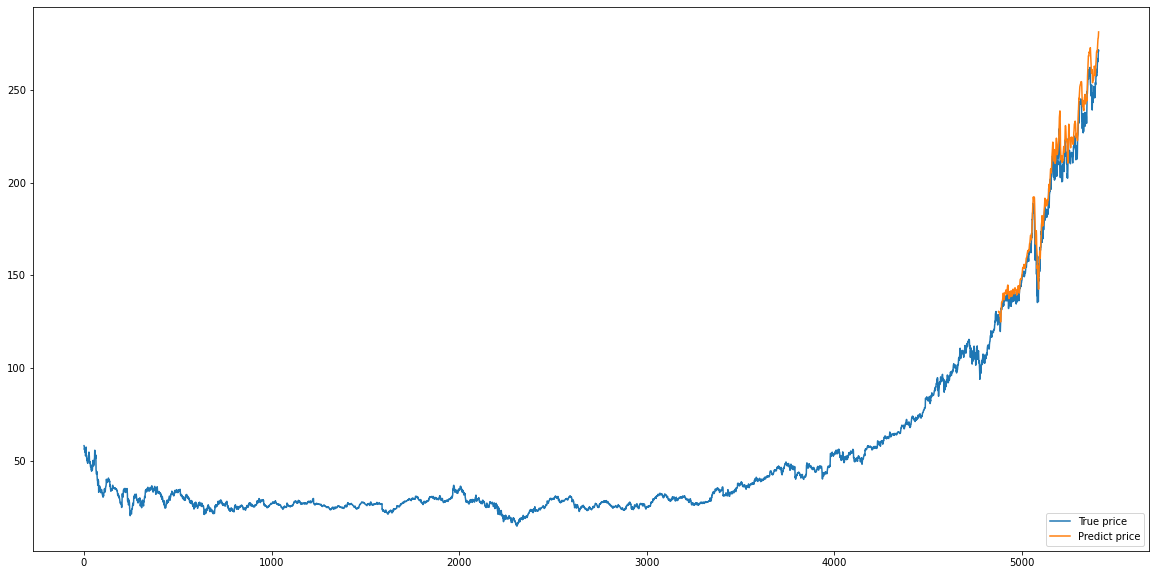

In [16]:
plt.figure(figsize = (20, 10))
plt.plot(data['close'])
plt.plot(valid_df['predictions'])
plt.legend(['True price', 'Predict price'], loc = 'lower right')
plt.show()

In [ ]:
X_future = []
X_future.append(dataset[-60:])
X_future = np.array(X_future)
X_future.shape

In [ ]:
y_future = yf.download("MSFT", start="2021-07-01", end="2021-07-02")
y_future

In [ ]:
y_pred = model_lstm.predict(X_future)
y_pred = scaler.inverse_transform(y_pred)
y_pred

In [ ]:
!python3 1_StockApp.py

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "1_StockApp" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
